# Finding the inflection point of intensities

Exponential growth starts at x = 7565, y = 0.007380481


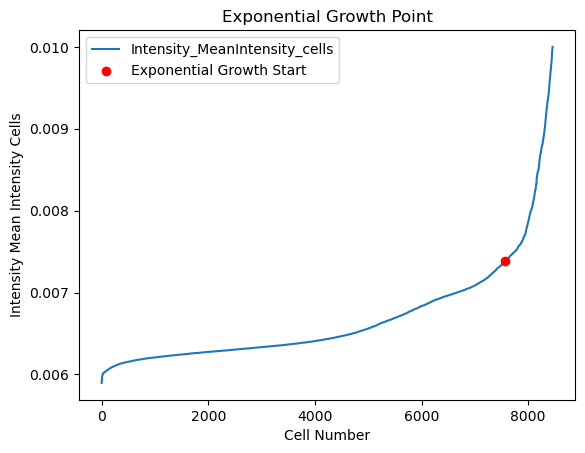

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data from the Excel file
data = pd.read_excel('/Users/pegaheizad/Desktop/Ghosh_lab/data_files/cd73_intensities.xlsx')

# Extract x (cell_num) and y (Intensity_MeanIntensity_cells) values
x = data['cell_num'].values
y = data['Intensity_MeanIntensity_cells'].values

# Calculate the first derivative (slope)
dy = np.gradient(y, x)

# Calculate the second derivative (rate of change of the slope)
ddy = np.gradient(dy, x)

# Set the threshold for the second derivative to detect exponential growth
threshold = np.mean(ddy) + 2 * np.std(ddy)

# Filter the data to only include points after x = 2000
valid_indices = np.where(x > 2000)

# Apply the threshold condition on the filtered second derivative data
exponential_growth_index = valid_indices[0][np.where(ddy[valid_indices] > threshold)[0][0]]

# Output the point of exponential growth
print(f"Exponential growth starts at x = {x[exponential_growth_index]}, y = {y[exponential_growth_index]}")

# Plot the original data and mark the point of exponential growth
plt.plot(x, y, label='Intensity_MeanIntensity_cells')
plt.scatter(x[exponential_growth_index], y[exponential_growth_index], color='red', label='Exponential Growth Start', zorder=5)
plt.xlabel('Cell Number')
plt.ylabel('Intensity Mean Intensity Cells')
plt.title('Exponential Growth Point')
plt.legend()
plt.show()
